In [1]:
# 라이브러리 호출
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
# MAT 파일 불러오기
mat_path = r"../HW3_package/hw3_prob2.mat"
mat_data = scipy.io.loadmat(mat_path)


f = mat_data['f']
x_orig = mat_data['x_orig']

In [3]:
def Dh(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 1:cols] = u[:, 1:cols] - u[:, 0:cols-1]
    d[:, 0] = u[:, 0] - u[:, cols-1]
    return d

def Dht(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[:, 0:cols-1] = u[:, 0:cols-1] - u[:, 1:cols]
    d[:, cols-1] = u[:, cols-1] - u[:, 0]
    return d

def Dv(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[1:rows, :] = u[1:rows, :] - u[0:rows-1, :]
    d[0, :] = u[0, :] - u[rows-1, :]
    return d

def Dvt(u):
    rows, cols = u.shape
    d = np.zeros((rows, cols))
    d[0:rows-1, :] = u[0:rows-1, :] - u[1:rows, :]
    d[rows-1, :] = u[rows-1, :] - u[0, :]
    return d

In [4]:
# 1로 초기화 
wh = np.ones(f.shape)
wv = np.ones(f.shape)
x = np.zeros(f.shape)

mu = 0.02
lmbd = 0.0002 

stopping_point = 1e-4
result = []


    
for idx in range(2):
    
    # w를 1로 초기화 해주어야 하기 때문에 idx가 1일 때부터 w의 값을 조정해준다. 
    if idx > 0:
        # mu, sigma, lambda 찾기 
        sigma = 300
        mu = 0.0001
        lmbd = 2
        
        wh = 1 / (np.abs(Dh(x)) + sigma)
        wv = 1 / (np.abs(Dv(x)) + sigma) 
        
    dh = np.zeros(f.shape)
    dv = np.zeros(f.shape)
    qh = np.zeros(f.shape)
    qv = np.zeros(f.shape)
    
    for iter in range(10000):
        x_minus1 = x
        
        # minimize x
        x = (mu * f)  + lmbd * (wh ** 2 * (np.roll(x, 1, axis = 1) + np.roll(x, -1, axis = 1)) + wv ** 2 * (np.roll(x, 1, axis = 0) + np.roll(x, -1, axis = 0)) + wh * Dht(dh - qh) + wv * Dvt(dv - qv))  
        x = x / (mu + lmbd * 2 * wh ** 2 + lmbd * 2 * wv ** 2 )
        
        # minimize dv, dh
        dh =  np.sign(wh *  Dh(x) + qh) * np.maximum(np.abs(wh * Dh(x) + qh) - (1 / lmbd), 0)
        dv =  np.sign(wv *  Dv(x) + qv) * np.maximum(np.abs(wv * Dv(x) + qv) - (1 / lmbd), 0)
        
        # minimize qv, qh 
        qh = qh + (wh * Dh(x) - dh)
        qv = qv + (wv * Dv(x) - dv)
        
        # break check
        if  (np.linalg.norm((x - x_minus1), 2) / np.linalg.norm(x, 2)) < stopping_point:
            break    
            
    result.append(x)

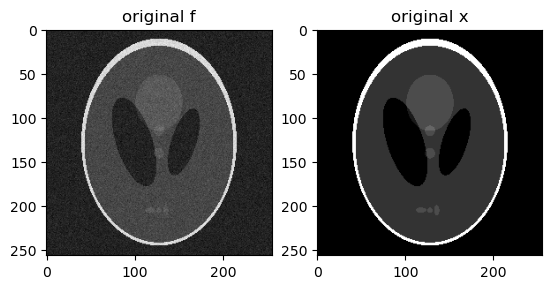

In [5]:
# original f 
plt.subplot(121)
plt.imshow(f, cmap = "gray")
plt.title( label = "original f")

# original x 
plt.subplot(122)
plt.imshow(x_orig, cmap = "gray")
plt.title( label = "original x")

plt.show()

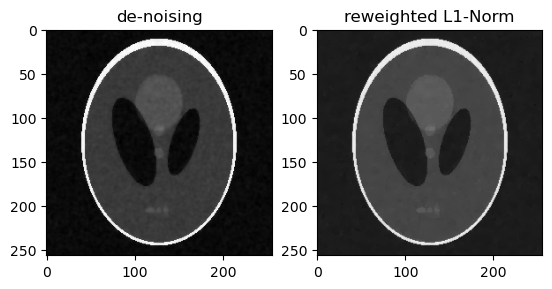

In [6]:
plt.subplot(121)
plt.imshow(result[0], cmap = "gray")
plt.title( label = "de-noising")

plt.subplot(122)
plt.imshow(result[1], cmap = "gray")
plt.title( label = "reweighted L1-Norm")

plt.show()